# Image Segmentation
`WORK IN PROGRESS`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [3]:
from sklearn.cluster import KMeans

## Loading Image

In [6]:
img = mpimg.imread('./images/sea_shore.png')

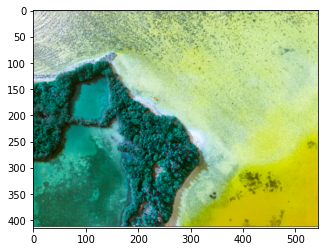

In [7]:
plt.imshow(img)

In [19]:
x,y,z = img.shape

print(f"""
height : {x}
width  : {y}
layers : {z}
""")


height : 415
width  : 543
layers : 4



lets take only 3 layers

In [20]:
img = img[...,:3]

In [21]:
x,y,z = img.shape

print(f"""
height : {x}
width  : {y}
layers : {z}
""")


height : 415
width  : 543
layers : 3



## Flattening 
                  layer3 ___________________
                        |x3                 |
             layer2 ____|______________     |
                   |x2                 |    |
         layer1 ___|______________     |    |
               |x1                |    |    |
               |                  |    |    |
               |                  |    |    |
       height  |                  |    |    |
               |                  |    |    |
               |                  |    |____|
               |                  |    |
               |                  |____|
               |                  |
               |__________________|
                   
                      width
                   

                           Layers
                    _____________________
                   | x1      x2       x3 |
                   |                     |
                   |                     |
                   |                     |
    height * width |                     |
                   |                     |
                   |                     |
                   |        ...          |

                 

In [22]:
flatten = img.reshape(x*y,z)

In [28]:
flatten.shape

(225345, 3)

In [29]:
model = KMeans(n_clusters=3)

In [30]:
clustered = model.fit_predict(flatten)

In [31]:
clustered_frame = clustered.reshape(x,y)
clustered_frame.shape

(415, 543)

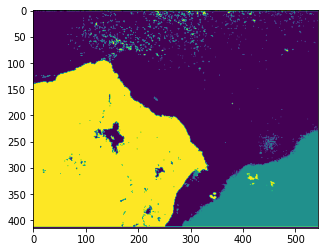

In [32]:
plt.imshow(clustered_frame)

## Convert to gray scale

In [33]:
gray_img = img.mean(axis=-1)
gray_img.shape

(415, 543)

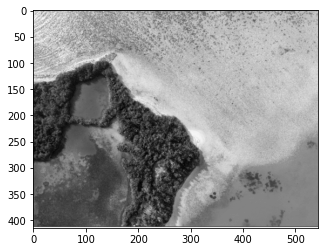

In [34]:
plt.imshow(gray_img,cmap='gray')

## Gaussian smoothing

https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm


<img src='https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gausmask.gif' />

In [50]:
from scipy import signal

gaussian_smoothing = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])/ 273


edge_frame = signal.convolve2d(img.mean(axis=-1),gaussian_smoothing,mode='same')

In [51]:
edge_frame.shape

(415, 543)

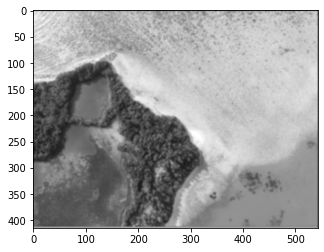

In [52]:
plt.imshow(edge_frame,cmap='gray')

## OpenCV Canny Edge Detection


https://en.wikipedia.org/wiki/Canny_edge_detector

In [50]:
img = cv2.imread('./images/cat.jpg',0)

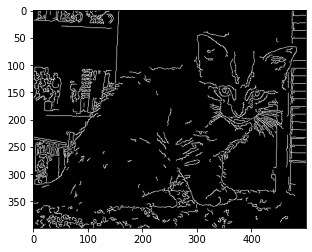

In [61]:
edge = cv2.Canny(img,50,100)
plt.imshow(edge,cmap = 'gray')